In [8]:
import os
import math
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
import scipy.interpolate as interp
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process import GaussianProcessClassifier
%matplotlib inline

In [2]:
data_path = os.path.join(os.getcwd(), 'data', 'regression_part2.csv')
data = pd.read_csv(data_path, delimiter = ',')

In [142]:
np.max(data['input'])

4.875

In [145]:
y = data['output']
ons = np.ones((data.shape[0], 1))
#data.insert(0, 'bias', ons)
X = data.drop(['output'], axis=1)

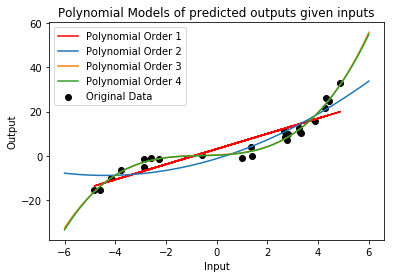

In [144]:
y = data['output']
ons = np.ones((data.shape[0], 1))
#data.insert(0, 'bias', ons)
X = data.drop(['output'], axis=1)
mod = LinearRegression(fit_intercept=False)
mod.fit(X, y)
preds = mod.predict(X)
plt.scatter(data['input'], data['output'], color="black", label="Original Data") # data
plt.plot(data['input'], preds, color="red", label="Polynomial Order 1") # degrees=1

X, y = data['input'], data['output']
mymodel2 = np.poly1d(np.polyfit(X, y, 2))
mymodel3 = np.poly1d(np.polyfit(X, y, 3))
mymodel4 = np.poly1d(np.polyfit(X, y, 4))
myline = np.linspace(-6, 6, 100)
plt.plot(myline, mymodel2(myline), label="Polynomial Order 2")
plt.plot(myline, mymodel3(myline), label="Polynomial Order 3")
plt.plot(myline, mymodel4(myline), label="Polynomial Order 4")
plt.legend()
plt.xlabel("Input")
plt.ylabel("Output")
plt.title("Polynomial Models of predicted outputs given inputs")
plt.savefig("finally.png")
plt.show()

In [106]:
mse_1 = mean_squared_error(y, preds[0])
mse_2 = mean_squared_error(y, preds[1])
mse_3 = mean_squared_error(y, preds[2])
mse_4 = mean_squared_error(y, preds[3])
mses = [mse_1, mse_2, mse_3, mse_4]

[24.744378032672852,
 17.352926937873296,
 2.7447567192524285,
 2.7389111790755374]

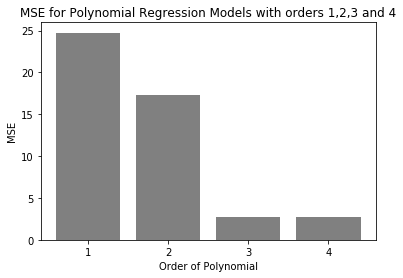

In [111]:
labels = [1,2,3,4]
xs = np.arange(len(labels))
fig, ax = plt.subplots()
ax.bar(xs, mses, color="gray")
ax.set_xticks(xs)
ax.set_xticklabels(labels)
ax.set_xlabel("Order of Polynomial")
ax.set_ylabel("MSE")
ax.set_title("MSE for Polynomial Regression Models with orders 1,2,3 and 4")
plt.savefig('bar1.png')

In [39]:
# closed version
w = np.dot(np.linalg.pinv(X), y)
predicted_scores_1 = np.dot(w[1], X) + w[0]
predicted_scores_1 = predicted_scores_1[:,1]
MSE_1 = mean_squared_error(y, predicted_scores_1)
MSE_1

30.985472614541294

In [32]:
# sklearn version
lm = LinearRegression(fit_intercept=False)
lm.fit(X, y)
predicted_scores = lm.predict(X)
MSE = mean_squared_error(y, predicted_scores)
print(MSE)

30.985472614541294


In [ ]:
x_axis = np.linspace(-2,2, 100)

In [ ]:
w1 = -2
mses = []
while w1<=2:
    pred = np.dot(w1, X) + 20
    pred = pred[:,1]
    mses.append(mean_squared_error(y, pred))
    w1+=0.04
x_axis = np.linspace(-2,2, 100)
plt.plot(x_axis, mses)
plt.xlabel("w1")
plt.ylabel("MSE")
plt.title("MSE when w0 = 20 and w1 varies between -2 and 2")
plt.savefig('figure3.png')
plt.show()

In [ ]:
val = np.array(mses) == np.min(mses)
min_mse = np.min(mses) # 32.337
np.where(np.array(mses) == np.min(mses)) # 84th
index = -2 + (0.04 * 84) # 1.36

In [ ]:
# Radial Basis Functions:

In [6]:
centres = [-4.0, -2.0, 2.0, 4.0]
widths = [0.2, 100, 1000]

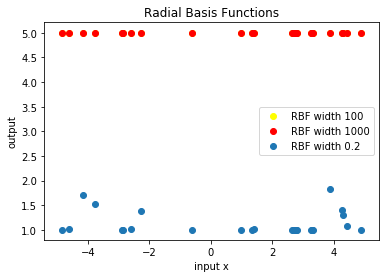

In [94]:
def rbf(centre, width):
    preds = []
    for x in data['input']:
        preds.append(math.exp(-0.5*((x - centre)**2) / width**2))
    return preds
new_preds_1 = []
for i in range(0, len(preds)):
    new_preds_1.append(1 + rbf(-4,0.2)[i] + rbf(-2,0.2)[i] + rbf(2,0.2)[i] + rbf(4,0.2)[i])
new_preds_2 = []
for i in range(0, len(preds)):
    new_preds_2.append(1 + rbf(-4,100)[i] + rbf(-2,100)[i] + rbf(2,100)[i] + rbf(4,100)[i])
new_preds_3 = []
for i in range(0, len(preds)):
    new_preds_3.append(1 + rbf(-4,1000)[i] + rbf(-2,1000)[i] + rbf(2,1000)[i] + rbf(4,1000)[i])
plt.scatter(data['input'], new_preds_2, label="RBF width 100", color="yellow")
plt.scatter(data['input'], new_preds_3, label="RBF width 1000", color="red")
plt.scatter(data['input'], new_preds_1, label="RBF width 0.2")
plt.legend()
plt.xlabel("input x")
plt.ylabel("output")
plt.title("Radial Basis Functions")
plt.savefig("rbf.png")
plt.show()

In [78]:
np.min(data['output'])

-15.577

In [79]:
np.max(data['output'])

32.976

In [81]:
new_preds_1*data['output']

0      9.100060
1     12.796094
2    -17.172234
3     32.978301
4     10.474528
5     30.515251
6     -5.204333
7     -2.030331
8      8.562002
9      6.932450
10    28.692312
11   -15.580081
12    11.458034
13     9.855442
14    27.105130
15     3.995643
16   -15.424196
17    -0.155843
18    -1.001117
19    -1.133003
20    10.758330
21     0.536000
22    -9.653477
23    -1.673209
24    33.715901
Name: output, dtype: float64